In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("ggplot")
import sklearn
from sklearn.decomposition import TruncatedSVD

In [2]:
df = pd.read_csv('GroceryDataset.csv')

In [3]:
df.head()

,Sub Category,Price,Discount,Rating,Title,Currency,Feature,Product Description
0,Bakery & Desserts,$56.99,No Discount,Rated 4.3 out of 5 stars based on 265 reviews.,"David’s Cookies Mile High Peanut Butter Cake, ...",$,"""10"""" Peanut Butter Cake\nCertified Kosher OU-...",A cake the dessert epicure will die for!Our To...
1,Bakery & Desserts,$159.99,No Discount,Rated 5 out of 5 stars based on 1 reviews.,"The Cake Bake Shop 8"" Round Carrot Cake (16-22...",$,Spiced Carrot Cake with Cream Cheese Frosting ...,"Due to the perishable nature of this item, ord..."
2,Bakery & Desserts,$44.99,No Discount,Rated 4.1 out of 5 stars based on 441 reviews.,"St Michel Madeleine, Classic French Sponge Cak...",$,100 count\nIndividually wrapped\nMade in and I...,Moist and buttery sponge cakes with the tradit...
3,Bakery & Desserts,$39.99,No Discount,Rated 4.7 out of 5 stars based on 9459 reviews.,"David's Cookies Butter Pecan Meltaways 32 oz, ...",$,Butter Pecan Meltaways\n32 oz 2-Pack\nNo Prese...,These delectable butter pecan meltaways are th...
4,Bakery & Desserts,$59.99,No Discount,Rated 4.5 out of 5 stars based on 758 reviews.,"David’s Cookies Premier Chocolate Cake, 7.2 lb...",$,"""10"" Four Layer Chocolate Cake\nCertified Kosh...",A cake the dessert epicure will die for!To the...


In [4]:
df.isnull().sum()

Sub Category              0
Price                     3
Discount                  0
Rating                 1075
Title                     0
Currency                  5
Feature                  18
Product Description      42
dtype: int64

In [5]:
df.values.tolist()

[['Bakery & Desserts',
  '$56.99 ',
  'No Discount',
  'Rated 4.3 out of 5 stars based on 265 reviews.',
  'David’s Cookies Mile High Peanut Butter Cake, 6.8 lbs (14 Servings)',
  '$',
  '"10"" Peanut Butter Cake\nCertified Kosher OU-D\n14 Servings',
  'A cake the dessert epicure will die for!Our Top Selling Cake! Fudge brownie base, layered in velvety smooth peanut butter mousse, rich chocolate cake, topped with brownie chunks, handful of peanut butter chips, drizzled in fudge. This cake is the thoughtful gift idea that’s perfect for family, friends, coworkers, or to anyone you care about in your life. -\tGenerously sized precut slices, a cake lover’s dreams come true! Includes:Measures 10” diameterWeighs in at 6.8 lbs.14 servings OU-D certified, the most trusted kosher certification in the U.S.All natural with no added preservativesSome of our products may contain nuts. Our facility is NOT a nut-free facility, and as a result it is possible that any product may have come in contact w

In [13]:
T = []
for i in range(len(df)):
  T.append([str(df.values[i,j]) for j in range(0,4)if str(df.values[i,j])!='nan'])

In [14]:
T

[['Bakery & Desserts',
  '$56.99 ',
  'No Discount',
  'Rated 4.3 out of 5 stars based on 265 reviews.'],
 ['Bakery & Desserts',
  '$159.99 ',
  'No Discount',
  'Rated 5 out of 5 stars based on 1 reviews.'],
 ['Bakery & Desserts',
  '$44.99 ',
  'No Discount',
  'Rated 4.1 out of 5 stars based on 441 reviews.'],
 ['Bakery & Desserts',
  '$39.99 ',
  'No Discount',
  'Rated 4.7 out of 5 stars based on 9459 reviews.'],
 ['Bakery & Desserts',
  '$59.99 ',
  'No Discount',
  'Rated 4.5 out of 5 stars based on 758 reviews.'],
 ['Bakery & Desserts',
  '$59.99 ',
  'No Discount',
  'Rated 4.4 out of 5 stars based on 369 reviews.'],
 ['Bakery & Desserts',
  '$74.99 ',
  'No Discount',
  'Rated 4.7 out of 5 stars based on 2241 reviews.'],
 ['Bakery & Desserts',
  '$59.99 ',
  'No Discount',
  'Rated 4.4 out of 5 stars based on 232 reviews.'],
 ['Bakery & Desserts',
  '$29.99 ',
  'No Discount',
  'Rated 4.4 out of 5 stars based on 1679 reviews.'],
 ['Bakery & Desserts',
  '$159.99 ',
  'No Dis

In [27]:
from apyori import apriori
rules = apriori(T,min_support=0.1, min_confidence=0.1, min_lift=3,min_length=2)

In [31]:
list(rules)

[]

In [32]:
df.shape

(1757, 8)

In [38]:
popular_products = pd.DataFrame(df.groupby('Discount')['Rating'].count())
most_popular = popular_products.sort_values('Rating', ascending=False)
most_popular.head(10)

,Rating
Discount,
No Discount,648
After $30 OFF,4
After $50 OFF,4
After $20 OFF,4
After $10 OFF,3
After $60 OFF,3
.,2
After $12 OFF,2
After $70 OFF,2


<Axes: xlabel='Discount'>

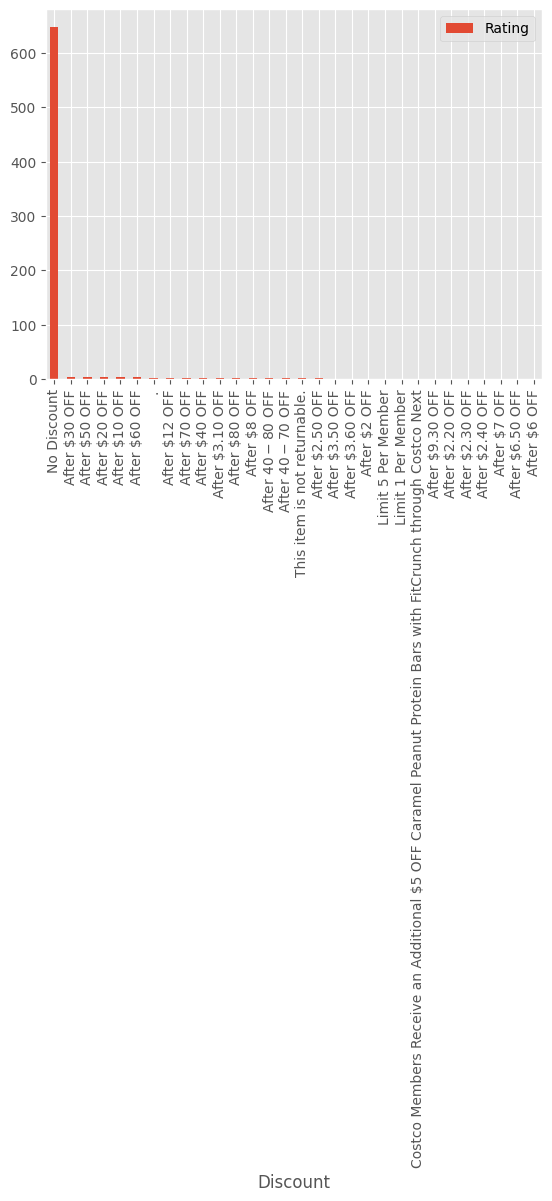

In [35]:
most_popular.head(30).plot(kind = "bar")